## Tutorial 3: Distinguishability
[v 2023-02-01]
Developed by Rebeckah Fussell for Cornell Physics Labs. [Adapted by L.A. Bumm 2022-09-16]

In this tutorial we will continue to apply the concepts of mean, standard deviation, and standard uncertainty of the mean. We will also learn about how to compare the means of different data sets and test for distinguishability.

Before we get started, let's load some packages and define the functions for standard deviation and standard uncertainty of the mean. These functions are identical to the ones in the previous tutorial.

Make sure to run the cell below before proceeding (SHIFT + ENTER). As always, remember code cells build on eachother, so run each in order. 

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import *
def standard_deviation(data):
    N = len(data)
    return np.sqrt(np.sum((data - np.mean(data))**2)/(N-1))

def standard_unc_of_mean(data):
    N = len(data)
    return standard_deviation(data) / np.sqrt(N)

In the uncertainty tutorial we talked about taking repeated measurements of a phenomenon, and that we expect to see a distribution of values around the mean.  On average, we would expect to see 68% of our measurements falling within one standard deviation of the mean.  If we take many such sets of measurements, we would expect the mean of each set to fall within one uncertainty of the mean 68% of the time.  


Often we need to determine if the means of two data sets of measurements are coming from the same underlying phenomenon. It is possible that we are measuring two different phenomena.  It is also possible we are measuring the same phenomena, however, even if we are measuring the same phenomena when we take two different data sets, we would still expect to see some difference in the means of two different data sets.  For example, if we take several measurements of the period of a pendulum when released from 10 degrees, and several more measurements of the period at 20 degrees, we need a method to know if the average period is the same (and therefore we are measuring the same physical phenomenon) or different when released from the two angles. We are going to call this distinguishibility.  

This method should:

1. Take into account the difference between the means of the two data sets, such that a larger difference means the values are more distinguishable.
2. Take into account the uncertainty of the means of the two data sets, such that the difference in the means is balanced by how well we know the measurements.
3. Not depend on units.


To make comparisons between two measurements with uncertainties $A \pm \delta A$ and $B \pm \delta B$, we use a quantity known as $t'$, also known as Welch's $t$-test. This is defined as:

$t' = |\frac{A-B}{\sqrt{\delta A^2 + \delta B^2}}|$. 

$A$ and $B$ might be the means for two sets of repeated measurements, such as our means of repeated measurements of the period of pendula released from 10 and 20 degrees. $\delta$ should be read as "uncertainty in", so $\delta A$ and $\delta B$ are the uncertainties in the measurements A and B (*not* the uncertainty times the measurements).


### 1.  Explain how the formula for $t^{\prime}$ takes into account the three properties above.  (0.5 points)

1. The numerator $A-B$ is how the formula $t^{\prime}$ is able to distinguish between larger differences of data set means. This is because it is a simple difference of the data sets and will reflect that exact difference.  
2. The denominator $\sqrt{\delta A^2+\delta B^2}$ is how we account for the uncertainty of the data set means. This is because we take the square root of the quadratic sum of the mean uncertainties $\delta A$ & $\delta B$, and divide the difference of the mean by this quantity. 
3. $t^{\prime}$ **does not** depend on units as the division of the units in the means $A$ & $B$ and their uncertainties $\delta A$ & $\delta B$ will cancel out the respective units.

### 2.

### a) Say we measure A = 2 ± 1 s and B = 8 ± 1 s. Intuitively, would you say that A and B are distinguishable or indistinguishable?  (0.5 points)
> I would say $A$ & $B$ are distinguishable. 
### b) What about if the uncertainties were larger: are A= 2 ± 5 s and B= 8 ± 5 s distinguishable?  (0.5 points)
> I would say $A$ & $B$ are significantly **less** distinguishable.
### c) Run the code below to calculate the t' value for these two sets of measurements.   (0.5 points)

In [2]:
def t_prime(A, dA, B, dB):
    return abs(A - B) / np.sqrt(dA**2 + dB**2)


# an example of using t_prime
print(t_prime(2,1,8,1))

# second example
print(t_prime(2,5,8,5))

4.242640687119285
0.848528137423857


## Exploring t'
You can think of t' as telling us how far apart the means of the distributions are in "units" of uncertainty.  The larger the t' value, the less likely it is that the two sets of measurements came from the same distribution. Below, we have two sets of measurements (one in blue and one in orange), with properties you can control with the sliders.  They have a mean (m), a number of measurements (N) and each a standard deviation.  Run the code below, and try using the sliders.  

In [3]:
def sliders(m=.05, N=20, stdev1=.25, stdev2=.25):
    fig, ax=plt.subplots(1,1, figsize=(5,5))
    ax.cla()
    x=np.linspace(-1, 2, 1000)
    ax.fill_between(x,np.e**(-x**2/stdev1**2),alpha=.5)
    ax.fill_between(x,np.e**(-(x-m)**2/stdev2**2), alpha=.5)
    ax.errorbar(0, 1, xerr=stdev1/np.sqrt(N), capsize=5)
    ax.errorbar(m, 1, xerr=stdev2/np.sqrt(N), capsize=5)
    ax.set_title("t'={}".format(round(np.sqrt(N)*m/np.sqrt(stdev1**2+stdev2**2), 3)))
    fig.canvas.draw_idle() 
    plt.tight_layout()   
    fig.show()       
interact(sliders,m=(0,1,.01), N=(5,100), stdev1=(0,0.6,.01), stdev2=(0,0.6,.01) );  



interactive(children=(FloatSlider(value=0.05, description='m', max=1.0, step=0.01), IntSlider(value=20, descri…

### 3. 

### a) What combination of factors causes t' to increase?  (0.5 points)
> Increasing $m$ & $N$ causes t' to increase, as well as decreasing the standard deviations **stdev1** & **stdev2**.

### b) What causes it to decrease?   (0.5 points)
> Increasing  the standard deviations **stdev1** & **stdev2** causes t' to decrease, as well as decreasing $m$ & $N$. 

### c) Does the difference in the mean have to change for t' to change?   (0.5 points)
> No, as changing any other value will also change $t^{\prime}$. 


## Interpreting t' values

If we have two sets of measurements of the same physical phenomenon, we would expect to see a t' value of approximately 1 on average. This is because, on average, most (68\%) of our measurements should be within one standard deviation of the mean, and so any two measurements should almost always be approximately one standard deviation away from each other.

After calculating $t'$ for two measurements, you can evaluate their disimilarity (or distinguishability) through the following interpretation:


1.  $t'\approx1$  If we have two sets of measurements and a t' value of approximately 1, then the sets are indistinguishible and they may represent the same physical phenomenon.   

2.  $t'<<1$  If we have a t' value of much less than 1, then it is possible that either we overestimated our uncertainties, or that our current level of precision is not good enough for the phenomenon that we are trying to measure.  

3.  $1\lesssim t'<3$  This is a grey area.  It is still possible that our two sets of measurements are coming from the same phenomenon, but it is less likely than if our t' is somewhere close to 1. 

4.  $t' >3$ If our t' is greater than 3, then it is unlikely that our two sets of measurements were measuring the same phenomena.  This means that we have distinguished between two sets of physical phenomena.  


NOTE: $|t'| \le 1$ **does not** mean that A and B are the same. It only tells us that the given data cannot allow us to distinguish between the two sets. For example, if you do a better measurement and decrease the uncertainties, you might later uncover a difference between A and B. That is, poor precision may be hiding a subtle difference!

### 4.  Based on these interpretations and your exploration with the sliders above, what do you think we should do next in each of these 4 scenarios? (0.5 points)

1.  $t'\approx1$  
> This would conclude that the sets may be indistinguishable and that both data sets are viable for analysis. However, increased precision in the measurements could show a subtle difference in the data. Thus, more trials or trials of larger size should be carried out to confirm this is **not** the case. 

2.  $t'<<1$ 
> This would mean more precise trials must be conducted, or errors in uncertainties need to be examined, before continuing. These data sets would not have enough significant data to determine if they are describing the same phenomenon. Thus, more trials should be carried out.

3.  $1\lesssim t'<3$ 
> This would be similar to $t'\approx1$, yet it would be more likely that increased precision in the measurements would yield a more distinguishable difference between the data sets. Thus, more trials or trials of larger size should be carried out to confirm this is **not** the case.

4.  $t' >3$ 
> This would mean the two data sets probably **do not** describe the same phenomenon, and are distinguishable. Thus, more trials should be carried out and the experimental procedures re-examined for errors in sample, population, or other sources such as poor precision. 

## Example Problem

Let's try an example problem. An experimenter measured the period of a pendulum at 10 degrees and 20 degrees using a simple stopwatch. They measured the time for the pendulumn to swing for one single period and conducted 14 trials for each angle. The data they collected is given in the first lines of code below. The code then generates a histogram so we can visualize the distribution of our data. Run the code cell below. 

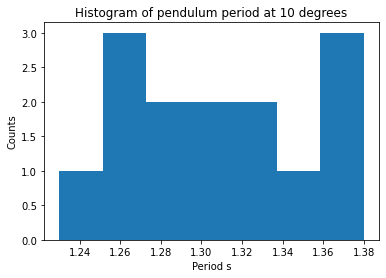

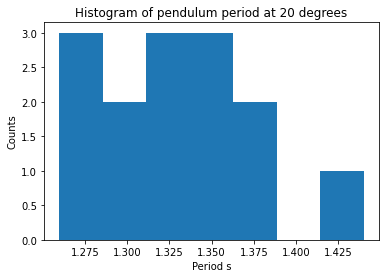

In [4]:
#enter pendulum period data
plt.figure()
ten_degs = np.array([1.23, 1.36, 1.35, 1.36, 1.30, 1.27, 1.30, 1.32, 1.26, 1.26, 1.38, 1.29, 1.29, 1.32])
twenty_degs = np.array([1.37, 1.35, 1.38, 1.27, 1.33, 1.33, 1.26, 1.36, 1.36, 1.27, 1.29, 1.44, 1.29, 1.32])

#plot distributions
plt.hist(ten_degs,bins = 7)
plt.title("Histogram of pendulum period at 10 degrees")
plt.ylabel('Counts')
plt.xlabel('Period s')

plt.figure();
plt.hist(twenty_degs,bins = 7)
plt.title("Histogram of pendulum period at 20 degrees")
plt.ylabel('Counts')
plt.xlabel('Period s')
plt.show()

### 5. a) Calculate standard deviation of the 10 degree data set. *Hint: replace the dots with the name of the ten degree data array as it was defined in the previous cell.* (1 point)

In [5]:
standard_deviation(ten_degs)

0.044307864010656325

### 5. b) Calculate standard deviation of the 20 degree data set. (1 point)


In [6]:
#write your function call here
standard_deviation(twenty_degs)

0.05099019513592785

Now we will shift to asking some questions about the experimenter's data set based on what you learned in class and in the statistics reading.

### 6.  Based on the data, what is the uncertainty in the measurements of the period from **instrumental precision**? *Hint: scroll back up to where the* ten_degs *and* twenty_degs *arrays are defined above. Notice that all the data reports the same number of digits after the decimal point. What does that say about the precision of the timer?* (0.5 points)

> Examining the arrays, I conclude that there is an instrumental precision of approximately $\pm 0.01$, which means the timer is slightly inaccurate in the hundredth place.  

### 7.  Calculate the uncertainty in a <u>*single*</u> trial of each set of measurements for the period of this pendulum from: i) ten degrees and ii) twenty degrees. *Hint: you will need to call one of the functions defined above (*<span style='font-family:Courier'>standard_deviation()</span>, <span style='font-family:Courier'>standard_unc_of_mean()</span>, or <span style='font-family:Courier'>t_prime()</span> *). Fill the parentheses with the name of the data set you want to make a calculation on.* (1 point)

In [21]:
#write function call here:
unc_q7_10 = standard_unc_of_mean(ten_degs)
unc_q7_20 = standard_unc_of_mean(twenty_degs)
#Out###############
out=f"""{'-'*42}
| The uncertainty of the 10 deg. trial is: 
| {unc_q7_10}
| The uncertainty of the 20 deg. trial is: 
| {unc_q7_20}
{'-'*42}
"""
print(out)

------------------------------------------
| The uncertainty of the 10 deg. trial is: 
| 0.011841774761974823
| The uncertainty of the 20 deg. trial is: 
| 0.013627702877384937
------------------------------------------



### 8.  Calculate the mean of each set of measurements of the period of this pendulum, including its uncertainty, from: i) ten degrees and ii) twenty degrees. We've provided a template, and you have to replace each ... with the relevant variable name or function call. (0.5 points each for i. and ii.)

In [17]:
print("i) ten degrees:")

#edit two lines below
mean_10 = np.mean(ten_degs)
unc_10 =  standard_unc_of_mean(ten_degs)

print("mean is " + str(mean_10) + " +/- " + str(unc_10))

i) ten degrees:
mean is 1.3064285714285713 +/- 0.011841774761974823


In [18]:
print("ii) twenty degrees:")

#edit two lines below
mean_20 = np.mean(twenty_degs)
unc_20 =  standard_unc_of_mean(twenty_degs)

print("mean is " + str(mean_20) + " +/- " + str(unc_20))

ii) twenty degrees:
mean is 1.33 +/- 0.013627702877384937


### 9.  Quantitatively compare the measurements of the period of this pendulum when released from 10 degrees and 20 degrees. Replace the ... with the relevant uncertainties. (1 point)

In [22]:
print(t_prime(mean_10, unc_10 , mean_20, unc_20))

1.3056170041744388


### 10. Interpret the results of your quantitative comparison in the previous question. Propose at least two next steps the experimenter could reasonably take based on these results. (See the Statistics Summary document or the previous homework tutorials for help). (0.5 points)

> Interpretation: This means that the two data sets could possibly come from the same phenomenon, yet more precision in measurements could yield a distinguishable difference.  

> Next step 1: The trials should be repeated to see if new data sets yield similar $t^{\prime}$ results.

> Next step 2: The experimenter could look at increasing the sample size or amount of measurements in order to overcome the instrumental precision. 


Save your notebook with all your answers to the questions, modified code cells, and output from each code cell. Submit your notebook by uploading it to the Canvas assignment.